<a href="https://colab.research.google.com/github/artem-bezrukov/spring_2022/blob/main/ml/lab_4/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ЛАБОРАТОРНАЯ РАБОТА №4**

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount=True)
df=pd.read_csv("/content/drive/MyDrive/kc_house_data.csv");
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error
from  sklearn import linear_model


Mounted at /content/drive


1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id - номер дома
date - дата продажи
price - цена проданного дома
bedrooms - количество спальных комнат
bathrooms - количество ванных комнат
sqft_living - площадь в квадратных футах 
sqft_lot - площадь к квадратных футах земли
floors - количество этажей
waterfront - выходиn ли квартира на береговую линию 
view - индекс оценки собственности 
condition - индекс оценки условий
grade - индекс уровня строительства
sqft_above - площадь в квадратных футах внутренней жилплощади, над уровнем земли
sqft_basement - площадь в квадратных футах внутренней жилплощади ниже уровня земли
yr_built - год первоначальной постройки здания
yr_renivated - год последней реставрации здания
zipcode - индекс дома
lat - широта
long - долгота
sqft_living15 - площадь в квадратных футах внутренней жилплощади до самых близких 15 соседей
sqft_lot15 - площадь в квадратных футах участков земли самых близких 15 соседей

2)Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [ ]:
df.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


3)Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [ ]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
categorial:  ['date']


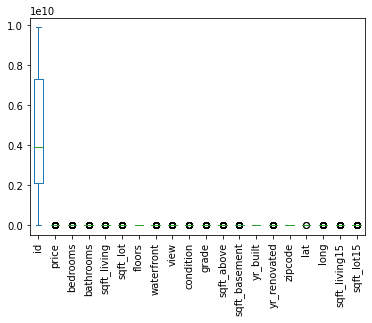

In [ ]:
%matplotlib inline
cols = ['bedrooms', 'bathrooms', 'floors']
df[numerical_columns].plot.box(rot=90)

Нормализуем числовые признаки

In [ ]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.720103,20141013T000000,0.019266,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,...,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,20141209T000000,0.060721,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,...,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.568795,20150225T000000,0.013770,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,...,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.251157,20141209T000000,0.069377,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,...,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.197333,20150218T000000,0.057049,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,...,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.026467,20140521T000000,0.037377,0.090909,0.31250,0.093585,0.000370,0.8,0.0,0.0,...,0.583333,0.135965,0.000000,0.947826,0.000000,0.515152,0.874055,0.143688,0.194631,0.000986
21609,0.666639,20150223T000000,0.042623,0.121212,0.31250,0.152453,0.003206,0.4,0.0,0.0,...,0.583333,0.221491,0.000000,0.991304,0.000000,0.732323,0.570693,0.130399,0.246257,0.007523
21610,0.153783,20140623T000000,0.042898,0.060606,0.09375,0.055094,0.000503,0.4,0.0,0.0,...,0.500000,0.080044,0.000000,0.947826,0.000000,0.722222,0.705324,0.182724,0.106866,0.001558
21611,0.029327,20150116T000000,0.042623,0.090909,0.31250,0.098868,0.001132,0.4,0.0,0.0,...,0.583333,0.143640,0.000000,0.904348,0.000000,0.131313,0.608975,0.373754,0.173980,0.000731


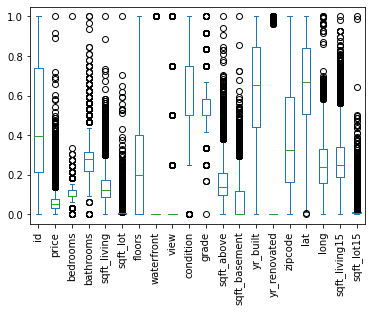

In [ ]:
df[numerical_columns].plot.box(rot=90)

4)Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

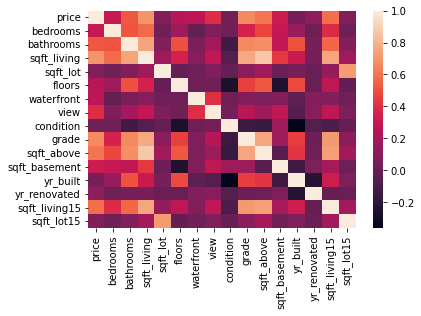

In [ ]:
corr_matrix = df.drop(['id','date','zipcode','lat','long'], axis=1).corr()
sns.heatmap(corr_matrix);
plt.show()

5) Заполните пропущенные значения в данных

In [ ]:
df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

6) Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

Линейная регрессия без регуляризатора

In [ ]:
X, y = df.drop(['price','date'], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
reg1 = linear_model.LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression()

In [ ]:
reg1_pred = reg1.predict(X_test)
print(reg1_pred[:15] - y_test[:15])

5506     0.013981
9279     0.008255
16034    0.020038
6608     0.030815
20359   -0.006134
8798     0.010034
10035   -0.007595
13321    0.025313
15842    0.025220
12119    0.022841
1799    -0.009795
15078   -0.019632
19275   -0.017835
4699     0.006889
4762    -0.028221
Name: price, dtype: float64


In [ ]:
Person, p_value_Person = pearsonr(reg1_pred, y_test)
Spirmen, p_value_Spirmen = spearmanr(reg1_pred, y_test)

print('Погрешность:', mean_squared_error(reg1_pred, y_test))
print("Корреляция по Пирсону: ", Person)
print("Корреляция по Спирмену: ", Spirmen)

Погрешность: 0.0006779541141115237
Корреляция по Пирсону:  0.8425462357046111
Корреляция по Спирмену:  0.8575614482777925


RIDGE регуляризатор

In [ ]:
reg = Ridge()
reg_grid = GridSearchCV(reg, {'alpha': np.arange(0, 1, 0.005)}, n_jobs = 4)
reg_grid.fit(X_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha

reg = Ridge(alpha=best_alpha)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)

print(reg_pred[:15] - y_test[:15])

5506     0.014087
9279     0.007797
16034    0.019427
6608     0.030729
20359   -0.005862
8798     0.009596
10035   -0.007314
13321    0.025242
15842    0.025097
12119    0.022677
1799    -0.009585
15078   -0.019622
19275   -0.017686
4699     0.006429
4762    -0.027710
Name: price, dtype: float64


In [ ]:
Person, p_value_Person = pearsonr(reg_pred, y_test)
Spirmen, p_value_Spirmen = spearmanr(reg_pred, y_test)

print('Погрешность:', mean_squared_error(reg_pred, y_test))
print("Корреляция по Пирсону: ", Person)
print("Корреляция по Спирмену: ", Spirmen)

Погрешность: 0.0006780206252321748
Корреляция по Пирсону:  0.8425085082974922
Корреляция по Спирмену:  0.8580338204123084
